In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# BASE_URL = '/content/drive/MyDrive/Colab Notebooks/MLT/owd'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Dataset

In [2]:
df_owd1 = pd.read_csv("../src/dataset/1990-2020_day.csv", parse_dates=True)
# df_owd = pd.read_csv(os.path.join(BASE_URL,"1990-2020_day.csv"), parse_dates=True)
df_owd1['dt_iso'] = pd.to_datetime(df_owd1['dt_iso'])
df_owd1.head()

,dt_iso,temp_mean,temp_min_min,temp_max_max,pressure_mean,humidity_mean,wind_speed_mean,wind_deg_mean,clouds_all_mean,rain_1d
0,1990-01-01,26.333750,25.03,27.40,1009.333333,85.416667,1.477083,194.291667,91.541667,9.40
1,1990-01-02,25.559583,24.92,26.55,1009.666667,87.541667,2.096667,247.458333,99.958333,36.71
2,1990-01-03,26.956667,26.09,27.52,1008.583333,82.250000,2.122083,271.125000,96.000000,5.02
3,1990-01-04,26.638750,25.91,27.15,1007.958333,84.541667,2.652500,202.458333,98.541667,10.54
4,1990-01-05,27.940417,27.40,28.83,1007.916667,78.708333,2.905000,131.458333,99.708333,0.71


In [3]:
df_owd2 = pd.read_csv("../src/dataset/data_stamet_ngurah_rai_pre.csv", parse_dates=True)
# df_owd = pd.read_csv(os.path.join(BASE_URL,"data_stamet_ngurah_rai_pre.csv"), parse_dates=True)
df_owd2.rename(columns = {'Tanggal':'dt_iso', 'Tn':'temp_min_min', 
    'Tx':'temp_max_max', 'Tavg':'temp_mean', 'RH_avg':'humidity_mean', 
    'ff_avg':'wind_speed_mean', 'RR':'rain_1d'}, inplace = True)
df_owd2['dt_iso'] = pd.to_datetime(df_owd2['dt_iso'])
df_owd2.head()

,dt_iso,temp_min_min,temp_max_max,temp_mean,humidity_mean,wind_speed_mean,rain_1d
0,1990-01-01,25.0,32.8,29.1,75.0,2.0,0.0
1,1990-02-01,26.0,31.0,26.4,86.0,1.0,0.0
2,1990-03-01,25.0,31.6,27.9,76.0,2.0,17.2
3,1990-04-01,25.0,30.8,28.0,81.0,2.0,34.8
4,1990-05-01,25.0,29.8,27.2,86.0,2.0,6.1


### Cleansing

In [4]:
df_owd1.loc[(df_owd1['temp_min_min'] < 22.4), 'temp_min_min'] = 22.4

In [5]:
df_owd2 = df_owd2.replace(8888, 0)
df_owd2.fillna(df_owd2.mean(), inplace = True)

c:\Users\azrina\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


### Preprocess

In [6]:
df_owd_train1 = df_owd1[(df_owd1['dt_iso'] <= '2018-12-31')]
df_owd_test1 = df_owd1[(df_owd1['dt_iso'] >= '2019-01-01') & (df_owd1['dt_iso'] <= '2019-12-31')] # ignore 2020
df_owd_train2 = df_owd2[(df_owd2['dt_iso'] <= '2018-12-31')]
df_owd_test2 = df_owd2[(df_owd2['dt_iso'] >= '2019-01-01') & (df_owd2['dt_iso'] <= '2019-12-31')]

In [7]:
df_owd1 = df_owd1.set_index('dt_iso')
df_owd_train1 = df_owd_train1.set_index('dt_iso')
df_owd_test1 = df_owd_test1.set_index('dt_iso')
df_owd2 = df_owd2.set_index('dt_iso')
df_owd_train2 = df_owd_train2.set_index('dt_iso')
df_owd_test2 = df_owd_test2.set_index('dt_iso')

In [8]:
sc1 = MinMaxScaler(feature_range = (0, 1))
norm_df_owd1 = sc1.fit_transform(df_owd_train1)

sc2 = MinMaxScaler(feature_range = (0, 1))
norm_df_owd2 = sc2.fit_transform(df_owd_train2)

### Model

In [9]:
model1 = keras.models.load_model('../src/model/model1.h5')
model2 = keras.models.load_model('../src/model/model2.h5')

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 365, 1024)        1606656   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 365, 1024)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1969152   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 365)               187245    
                                                                 
Total params: 3,763,053
Trainable params: 3,763,053
Non-

In [11]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 365, 1024)        1597440   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 365, 1024)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1969152   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 365)               187245    
                                                                 
Total params: 3,753,837
Trainable params: 3,753,837
Non-

### Predict 2019

In [12]:
past_history = 365
n_feature1 = 9
n_feature2 = 6
X_predict1 = norm_df_owd1[-past_history:].reshape((-1, past_history, n_feature1))
X_predict2 = norm_df_owd2[-past_history:].reshape((-1, past_history, n_feature2))

In [13]:
hasil1 = model1.predict(X_predict1)
hasil2 = model2.predict(X_predict2)

1/1 [==============================] - 2s 2s/step


In [19]:
max1 = sc1.data_max_[-1]
min1 = sc1.data_min_[-1]
y_descaled1 = hasil1 * (max1 - min1) + min1

max2 = sc2.data_max_[-1]
min2 = sc2.data_min_[-1]
y_descaled2 = hasil2 * (max2 - min2) + min2

max = (max1 + max2) / 2.0
min = (min1 + min2) / 2.0

In [20]:
total_1d_predicted1 = pd.Series(y_descaled1.flatten(), name='total_1d_predicted_1')
total_1d_predicted2 = pd.Series(y_descaled2.flatten(), name='total_1d_predicted_2')

df_owd_test1 = df_owd_test1.reset_index()
df_owd_test2 = df_owd_test2.reset_index()
aggregated_2019_df = pd.concat([df_owd_test1['dt_iso'], 
    df_owd_test1['rain_1d'].rename('rain_1d_1'), 
    df_owd_test2['rain_1d'].rename('rain_1d_2'),
    ((df_owd_test1['rain_1d'] + df_owd_test2['rain_1d']) / 2.0).rename('rain_1d_mean'),
    total_1d_predicted1, 
    total_1d_predicted2,
    ((total_1d_predicted1 + total_1d_predicted2) / 2.0).rename('total_1d_predicted_mean')], axis=1)

In [21]:
aggregated_2019_df.set_index("dt_iso")
rain_1M_2019 = aggregated_2019_df.groupby([pd.Grouper(key='dt_iso', freq='M')]).rain_1d_mean.sum()
rain_1M_2019_pred = aggregated_2019_df.groupby([pd.Grouper(key='dt_iso', freq='M')]).total_1d_predicted_mean.sum()

# (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
rain_1M_2019 = (rain_1M_2019 - min) / (max - min)
rain_1M_2019_pred = (rain_1M_2019_pred - min) / (max - min)
mse = ((rain_1M_2019_pred - rain_1M_2019) ** 2).sum() / 12
print(mse)

0.10612196978914977


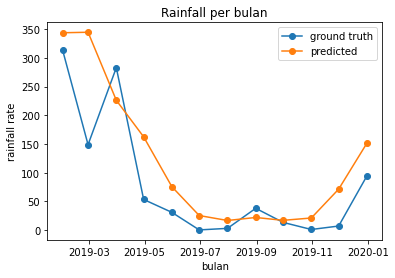

In [32]:
plt.plot(aggregated_2019_df.groupby([pd.Grouper(key='dt_iso', freq='M')]).rain_1d_mean.sum(), marker='o', label='ground truth')
plt.plot(aggregated_2019_df.groupby([pd.Grouper(key='dt_iso', freq='M')]).total_1d_predicted_mean.sum(), marker='o', label='predicted')
plt.title("Rainfall per bulan")
plt.ylabel("rainfall rate")
plt.xlabel("bulan")
plt.legend()
plt.show()

### Pecah per dasarian

In [23]:
df_M = aggregated_2019_df.groupby([pd.Grouper(key='dt_iso', freq='M')])

rain_10d, rain_10d_pred = [], []
for group_name, df_group in df_M:
    rain_10d.append(df_group["rain_1d_mean"][0:10].sum())
    rain_10d.append(df_group["rain_1d_mean"][10:20].sum())
    rain_10d.append(df_group["rain_1d_mean"][20:].sum())
    rain_10d_pred.append(df_group["total_1d_predicted_mean"][0:10].sum())
    rain_10d_pred.append(df_group["total_1d_predicted_mean"][10:20].sum())
    rain_10d_pred.append(df_group["total_1d_predicted_mean"][20:].sum())

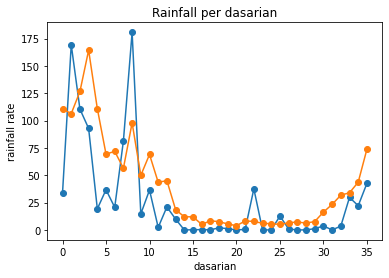

In [24]:
plt.plot(rain_10d, marker='o')
plt.plot(rain_10d_pred, marker='o')
plt.title("Rainfall per dasarian")
plt.ylabel("rainfall rate")
plt.xlabel("dasarian")
plt.show()

In [25]:
rain_10d_pred = np.array(rain_10d_pred)
rain_10d = np.array(rain_10d)

In [26]:
np.where(rain_10d > 50)

(array([1, 2, 3, 7, 8], dtype=int64),)

In [27]:
np.where(rain_10d_pred > 50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 35], dtype=int64),)